# CSC8111 - Machine Learning Coursework
###### Lakshmanan Balasubramanian
###### MSc Advanced Computer Science
###### 220237815 
Question 1

Importing all the packages to use for building the model 

In [1]:
pip install pmlb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
# Add Google drive
# from google.colab import drive
# drive.mount('/drive')
# Pandas
import pandas as pd
# NumPy
import numpy as np
# Matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Sklearn minmax scaler
from sklearn.preprocessing import MinMaxScaler
# Seaborn
import seaborn as sns
# pmlb data to get "FARS" data
from pmlb import fetch_data

### Data Exploration
The package "pmlb" is installed to extract the "FARS" data

In [3]:
# The FARS data is fetched and stored in the "FARS" variable
FARS = fetch_data('fars')
# The data are printed here
df = pd.DataFrame(FARS)
df.head()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,target
0,0,34,1,1,3,7,2,2,9,1,...,0,2,0,5,0,27,29,19,17,1
1,0,20,1,1,3,7,9,2,9,1,...,0,2,0,5,0,27,29,19,17,1
2,0,43,1,1,3,5,4,0,0,0,...,0,2,0,5,0,27,29,19,4,1
3,0,38,0,6,6,5,4,0,0,0,...,0,2,0,6,2,27,29,19,11,2
4,0,50,1,1,3,5,9,0,0,1,...,0,2,0,5,2,27,29,19,4,1


Display the column names of the data

In [4]:
# Let's Display all the available columns
for col in df.columns:
    print(col)

CASE_STATE
AGE
SEX
PERSON_TYPE
SEATING_POSITION
RESTRAINT_SYSTEM-USE
AIR_BAG_AVAILABILITY/DEPLOYMENT
EJECTION
EJECTION_PATH
EXTRICATION
NON_MOTORIST_LOCATION
POLICE_REPORTED_ALCOHOL_INVOLVEMENT
METHOD_ALCOHOL_DETERMINATION
ALCOHOL_TEST_TYPE
ALCOHOL_TEST_RESULT
POLICE-REPORTED_DRUG_INVOLVEMENT
METHOD_OF_DRUG_DETERMINATION
DRUG_TEST_TYPE
DRUG_TEST_RESULTS_(1_of_3)
DRUG_TEST_TYPE_(2_of_3)
DRUG_TEST_RESULTS_(2_of_3)
DRUG_TEST_TYPE_(3_of_3)
DRUG_TEST_RESULTS_(3_of_3)
HISPANIC_ORIGIN
TAKEN_TO_HOSPITAL
RELATED_FACTOR_(1)-PERSON_LEVEL
RELATED_FACTOR_(2)-PERSON_LEVEL
RELATED_FACTOR_(3)-PERSON_LEVEL
RACE
target


In [5]:
# Let's get total row and column counts
print(df.shape)

(100968, 30)


It is clear that we have 1,00,968 rows and 30 columns from the given data. Let's find how many duplicate data are there. We will remove the duplicate data.  

In [6]:
# Let's get the the duplicate rows and name it "TRUE" if duplicate
df['DUPLICATED'] = df.duplicated()

In [7]:
# Let's get the Unique data count for the column "DUPLICATED"
print(df['DUPLICATED'].value_counts())

False    93004
True      7964
Name: DUPLICATED, dtype: int64


From the above code, we could see that there are "7964" rows have been duplicated. Let's remove the duplicate rows.

In [8]:
# Let's remove the duplicate rows from the data
df.drop(df[df['DUPLICATED'] == True].index, inplace = True)

In [9]:
# Let's get total row and column counts
print(df.shape)

(93004, 31)


Now that we have removed the duplicate columns, Let's drop the column "DUPLICATED"

In [10]:
# Drop the column "DUPLICATED"
df.drop('DUPLICATED', inplace=True, axis=1)

In [11]:
# Let's get total row and column counts
print(df.shape)

(93004, 30)


### Data Preprocessing 

Let's get the count of the class label that is "target" (y).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03c6cca2e0>]],
      dtype=object)

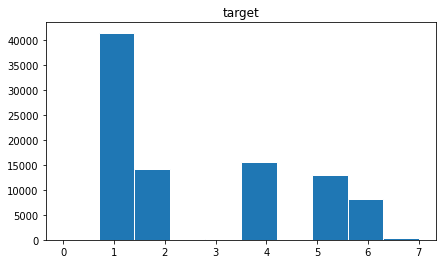

In [12]:
df.hist(column="target", grid=False, ec="white", figsize=(7,4))

In [13]:
print(df['target'].value_counts())

1    41442
4    15642
2    14230
5    12945
6     8104
7      399
3      233
0        9
Name: target, dtype: int64


Given that the class label describes the severity of the accident, the class "1", "4", "2" and "5" has the most number of cases.

Let's plot the AGE column as a histogram to see which age of people have involved in accidents

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03c6bb2d00>]],
      dtype=object)

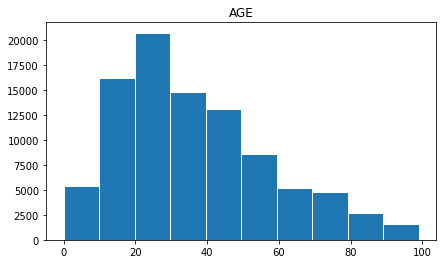

In [14]:
df.hist(column="AGE", grid=False, ec="white", figsize=(7,4))

In [15]:
print(df['AGE'].value_counts())

18    3285
19    3135
20    2899
21    2862
17    2839
      ... 
93      30
94      23
95      21
97      20
96      11
Name: AGE, Length: 99, dtype: int64


From the above histogram image, it is clearly seen that, the age group between 17 and 21 have involved in more number of accidents

Checking the data flow, if the data flow does not follow a normal data distribution, then it is better to Normalize data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03c66e9850>,
      dtype=object)

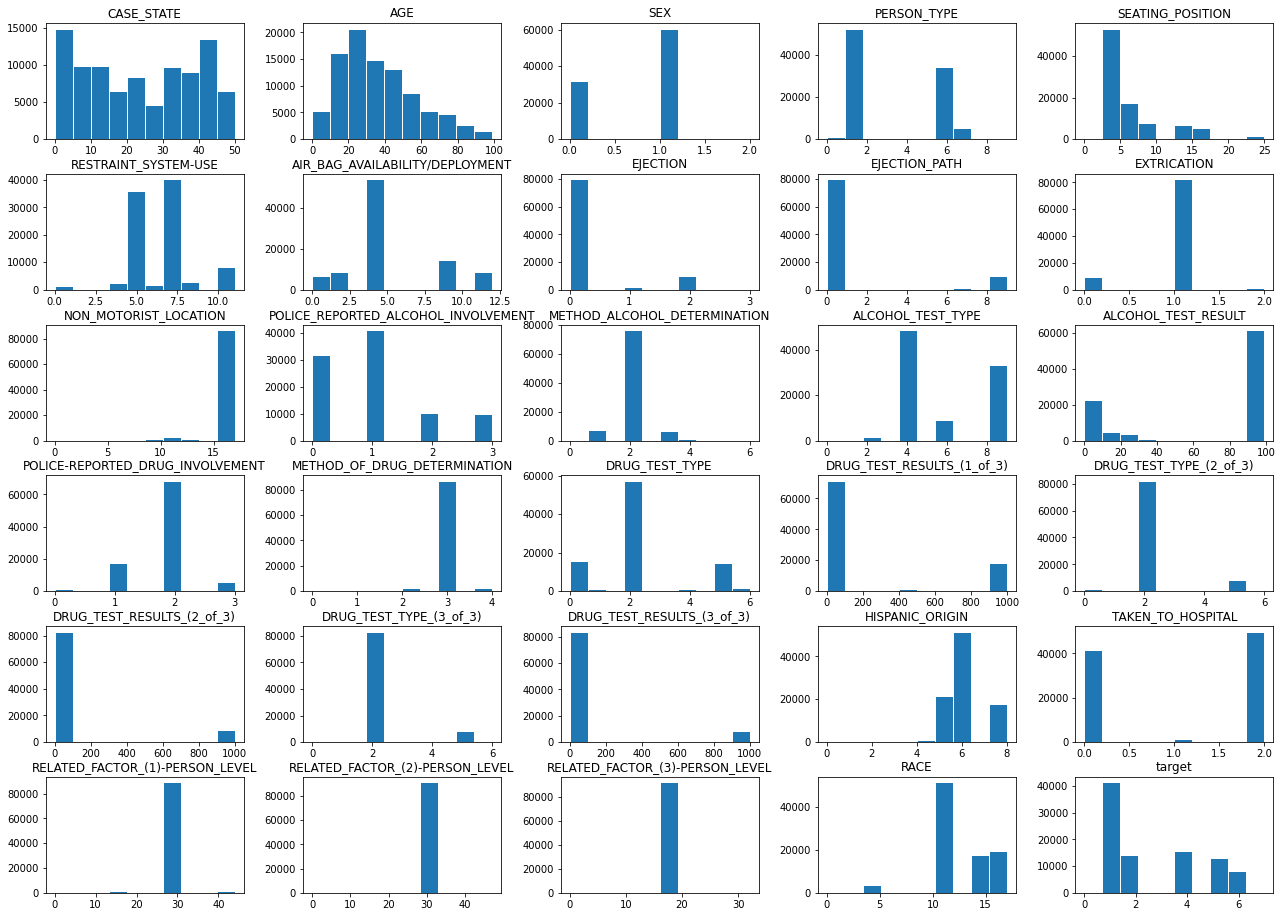

In [16]:
df.hist(grid=False, ec="white", figsize=(22,16))

From the above visualization, it can be said that the data distribution is not normal.

We will take the Independent and Dependent variable from the dataframe

In [17]:
X = df.iloc[:, :-1].values
print(len(X[0]))
print(X)

29
[[ 0 34  1 ... 29 19 17]
 [ 0 20  1 ... 29 19 17]
 [ 0 43  1 ... 29 19  4]
 ...
 [50  7  0 ... 29 19 11]
 [50  4  0 ... 29 19 11]
 [50 61  1 ... 29 19 17]]


In [18]:
y = df.iloc[:, -1].values
print(y)

[1 1 1 ... 6 6 1]


### Data Normalization
From the above Histogram, it is clear the data does flow in the gaussian distribution. Using the Min-Max Normalization, we have normalized the data between 0 and 1.

In [19]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(X)
X[0:5]

array([[0.        , 0.34343434, 0.5       , 0.11111111, 0.12      ,
        0.63636364, 0.16666667, 0.66666667, 1.        , 0.5       ,
        0.94117647, 1.        , 0.33333333, 1.        , 0.97979798,
        1.        , 0.75      , 0.83333333, 1.        , 0.33333333,
        0.        , 0.33333333, 0.        , 0.625     , 0.        ,
        0.61363636, 0.61702128, 0.59375   , 1.        ],
       [0.        , 0.2020202 , 0.5       , 0.11111111, 0.12      ,
        0.63636364, 0.75      , 0.66666667, 1.        , 0.5       ,
        0.94117647, 0.        , 0.33333333, 0.44444444, 0.96969697,
        0.33333333, 0.75      , 0.33333333, 0.        , 0.33333333,
        0.        , 0.33333333, 0.        , 0.625     , 0.        ,
        0.61363636, 0.61702128, 0.59375   , 1.        ],
       [0.        , 0.43434343, 0.5       , 0.11111111, 0.12      ,
        0.45454545, 0.33333333, 0.        , 0.        , 0.        ,
        0.94117647, 0.        , 0.33333333, 0.44444444, 0.96969697,
  

To display the data in integer.

In [20]:
X[0:5].astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0]])

Convert the Normalized numpy array as a Dataframe.

In [21]:
df.columns

Index(['CASE_STATE', 'AGE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'ALCOHOL_TEST_RESULT',
       'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
       'DRUG_TEST_TYPE', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)',
       'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)',
       'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL',
       'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL',
       'RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE', 'target'],
      dtype='object')

In [22]:
df_normalizer = pd.DataFrame(X, columns = ['CASE_STATE', 'AGE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'ALCOHOL_TEST_RESULT',
       'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
       'DRUG_TEST_TYPE', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)',
       'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)',
       'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL',
       'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL',
       'RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE'])

In [23]:
df_normalizer.head()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_TYPE_(2_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE
0,0.0,0.343434,0.5,0.111111,0.12,0.636364,0.166667,0.666667,1.0,0.5,...,0.333333,0.0,0.333333,0.0,0.625,0.0,0.613636,0.617021,0.59375,1.000000
1,0.0,0.202020,0.5,0.111111,0.12,0.636364,0.750000,0.666667,1.0,0.5,...,0.333333,0.0,0.333333,0.0,0.625,0.0,0.613636,0.617021,0.59375,1.000000
2,0.0,0.434343,0.5,0.111111,0.12,0.454545,0.333333,0.000000,0.0,0.0,...,0.333333,0.0,0.333333,0.0,0.625,0.0,0.613636,0.617021,0.59375,0.235294
3,0.0,0.383838,0.0,0.666667,0.24,0.454545,0.333333,0.000000,0.0,0.0,...,0.333333,0.0,0.333333,0.0,0.750,1.0,0.613636,0.617021,0.59375,0.647059
4,0.0,0.505051,0.5,0.111111,0.12,0.454545,0.750000,0.000000,0.0,0.5,...,0.333333,0.0,0.333333,0.0,0.625,1.0,0.613636,0.617021,0.59375,0.235294


### Feature Selection
Let's take the appropriate data neccessary for classifying the label. Also, let's drop some unwanted/unused columns if neccessary.

#### Removing Unused/Unwanted columns
<ul>
    <li>Here, we dont need columns like "RACE", "HISPANIC_ORIGIN" since it deals with the ethinic background and color of the person.
    </ul>

In [24]:
df_normalized = df_normalizer.drop(['RACE', 'HISPANIC_ORIGIN'], axis=1)

In [25]:
df_normalized.shape

(93004, 27)

In [26]:
df_normalized.columns

Index(['CASE_STATE', 'AGE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'ALCOHOL_TEST_RESULT',
       'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
       'DRUG_TEST_TYPE', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)',
       'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)',
       'TAKEN_TO_HOSPITAL', 'RELATED_FACTOR_(1)-PERSON_LEVEL',
       'RELATED_FACTOR_(2)-PERSON_LEVEL', 'RELATED_FACTOR_(3)-PERSON_LEVEL'],
      dtype='object')

Let's get the X from the df_normailzer dataframe.

In [27]:
X = df_normalized.to_numpy()
X[0:5].astype(int)
print(X[0])
print(len(X[0]))

[0.         0.34343434 0.5        0.11111111 0.12       0.63636364
 0.16666667 0.66666667 1.         0.5        0.94117647 1.
 0.33333333 1.         0.97979798 1.         0.75       0.83333333
 1.         0.33333333 0.         0.33333333 0.         0.
 0.61363636 0.61702128 0.59375   ]
27


### Model Training
#### Train Test split
Let's split the data into Training and Test dataset which will be further used to evaluate the data using the classification approach. This involves the data in splitting it into Training and Test which are mutually exclusive. After that, we train with the training set and test with the testing set.
<br>
This will provide a more accurate evaluation because the testing dataset is not part of the dataset that has been used to train the model.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (74403, 27) (74403,)
Test set: (18601, 27) (18601,)


## Model Interpretation
### Classification
Let's create a Dictionary to save all the models and it's score to evaluate which model was better.

In [29]:
best_algorithm_List = []
best_algorithm_Dict = {}

#### K-Nearest Neighbour Algorithm

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
print("----- Training the Model with k = 3 -----")
k=3
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
print("----- Prediction -----")
yhat = neigh.predict(X_test)
yhat[0:5]
print("----- Accuracy Score -----")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

----- Training the Model with k = 3 -----
----- Prediction -----
----- Accuracy Score -----
Train set Accuracy:  0.7699689528648038
Test set Accuracy:  0.612816515241116


#### Accuracy evaluation
In multi-label classification, accuracy classification score used to calculated the accuracy where how closely the actual labels and predicted labels are matched in the test set.

Let's find which k give the best accuracy from a range of k between 1 and 10

In [31]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.57319499, 0.61114994, 0.61281652, 0.62329982, 0.63088006,
       0.63453578, 0.63561099, 0.63679372, 0.63862158])

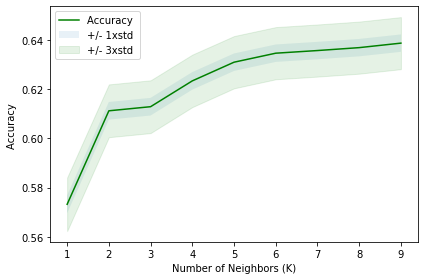

In [32]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [33]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
best_algorithm_Dict = {"Algorithm": "K-Nearest Neighbour (k)", "Best fit parameter": mean_acc.argmax()+1, "Accuracy": np.round(mean_acc.max(),2)}
best_algorithm_List.append(best_algorithm_Dict)

The best accuracy was with 0.6386215794849739 with k= 9


Let's make the classification report for the KNN.

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cr = classification_report(yhat, y_test)
print("Classification Report: KNN \n------------------------------------------------------\n", cr)

Classification Report: KNN 
------------------------------------------------------
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.84      0.77      0.80      8949
           2       0.45      0.42      0.43      3099
           3       0.11      0.33      0.16        12
           4       0.83      0.73      0.77      3638
           5       0.34      0.38      0.36      2304
           6       0.10      0.29      0.15       568
           7       0.19      0.52      0.27        31

    accuracy                           0.64     18601
   macro avg       0.36      0.43      0.37     18601
weighted avg       0.69      0.64      0.66     18601



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

Let's import the libraries for Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print(" ----- Training The Model ----- ")
decisionT = DecisionTreeClassifier(max_depth=4)
#X_train, X_test, y_train, y_test
print(" ----- Fitting the data with Train and Test set ----- ")
decisionT.fit(X_train,y_train)
print(" ----- Prediction using X_test data ----- ")
decision_Predict = decisionT.predict(X_test)
print (decision_Predict [0:5])
print (y_test [0:5])
print(" ----- Accuracy Score ----- ")
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, decision_Predict))

 ----- Training The Model ----- 
 ----- Fitting the data with Train and Test set ----- 
 ----- Prediction using X_test data ----- 
[2 2 1 2 1]
[5 6 1 1 1]
 ----- Accuracy Score ----- 
DecisionTrees's Accuracy:  0.606902854685232


Tuning the max_depth value in the Decision Tree

In [36]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)    
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4)
    accuracy.append(scores.mean()) 
print(accuracy)

[0.43699186801400947, 0.5641582483474498, 0.5865228457129639, 0.6011029005564664, 0.603382293566054, 0.6006942133203003, 0.6045652564297026, 0.6097154785629034, 0.606414380410843]


In [37]:
print( "The best accuracy of Decision Tree was with", max(accuracy), "with max_depth=", max_depth_range[np.array(accuracy).argmax()])
best_algorithm_Dict = {"Algorithm": "Decision Tree (max_depth)", "Best fit parameter": max_depth_range[np.array(accuracy).argmax()], "Accuracy": np.round(max(accuracy),2)}
best_algorithm_List.append(best_algorithm_Dict)

The best accuracy of Decision Tree was with 0.6097154785629034 with max_depth= 8


Let's make the classification report for the Decision Tree 

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cr = classification_report(decision_Predict, y_test)
print("Classification Report: Decision Tree \n------------------------------------------------------\n", cr)

Classification Report: Decision Tree 
------------------------------------------------------
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.85      0.69      0.76      9991
           2       0.66      0.38      0.48      5103
           3       0.00      0.00      0.00         0
           4       0.76      0.69      0.73      3507
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.61     18601
   macro avg       0.28      0.22      0.25     18601
weighted avg       0.78      0.61      0.68     18601



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Algorithm
Let's import the libraries for Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [40]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6294822858986076


In [41]:
# List of values to try for n_estimator:
max_n_estimator_range = [50, 100, 150, 200]
random_accuracy = []
for estimator in max_n_estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator)
    clf.fit(X_train, y_train)   
    y_pred=clf.predict(X_test) 
    score = metrics.accuracy_score(y_test, y_pred)
    random_accuracy.append(score) 
print(random_accuracy)

[0.6296435675501317, 0.6282457932369228, 0.6295898069996236, 0.630073651954196]


In [42]:
print( "The best accuracy of Random Forest was with", max(random_accuracy), "with n_estimator=", max_n_estimator_range[np.array(random_accuracy).argmax()])
best_algorithm_Dict = {"Algorithm": "Random Forest (n_estimator)", "Best fit parameter": max_n_estimator_range[np.array(random_accuracy).argmax()], "Accuracy": np.round(max(random_accuracy), 2)}
best_algorithm_List.append(best_algorithm_Dict)

The best accuracy of Random Forest was with 0.630073651954196 with n_estimator= 200


Let's create the classification report for the Random Forest.

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cr = classification_report(y_pred, y_test)
print("Classification Report: Random Forest \n------------------------------------------------------\n", cr)

Classification Report: Random Forest 
------------------------------------------------------
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.84      0.79      0.82      8648
           2       0.41      0.42      0.41      2849
           3       0.14      0.22      0.17        23
           4       0.79      0.73      0.76      3427
           5       0.34      0.35      0.35      2464
           6       0.16      0.22      0.18      1140
           7       0.33      0.56      0.41        50

    accuracy                           0.63     18601
   macro avg       0.37      0.41      0.39     18601
weighted avg       0.65      0.63      0.64     18601



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
df_best_Algo = pd.DataFrame.from_dict(best_algorithm_List)
# Print the table
df_best_Algo.head()

,Algorithm,Best fit parameter,Accuracy
0,K-Nearest Neighbour (k),9,0.64
1,Decision Tree (max_depth),8,0.61
2,Random Forest (n_estimator),200,0.63


From the above table, we could see that the <b>KNN</b> gives the best accuracy when compared to the other two algorithms.

Still, the accuracy is low and let's improve it

Previously, we dropped the columns "RACE" and "HISPANIC_ORIGIN", let's add that columns back again with the dataset

In [45]:
df_normalizer

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_TYPE_(2_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE
0,0.0,0.343434,0.5,0.111111,0.12,0.636364,0.166667,0.666667,1.0,0.5,...,0.333333,0.0,0.333333,0.0,0.625,0.0,0.613636,0.617021,0.59375,1.000000
1,0.0,0.202020,0.5,0.111111,0.12,0.636364,0.750000,0.666667,1.0,0.5,...,0.333333,0.0,0.333333,0.0,0.625,0.0,0.613636,0.617021,0.59375,1.000000
2,0.0,0.434343,0.5,0.111111,0.12,0.454545,0.333333,0.000000,0.0,0.0,...,0.333333,0.0,0.333333,0.0,0.625,0.0,0.613636,0.617021,0.59375,0.235294
3,0.0,0.383838,0.0,0.666667,0.24,0.454545,0.333333,0.000000,0.0,0.0,...,0.333333,0.0,0.333333,0.0,0.750,1.0,0.613636,0.617021,0.59375,0.647059
4,0.0,0.505051,0.5,0.111111,0.12,0.454545,0.750000,0.000000,0.0,0.5,...,0.333333,0.0,0.333333,0.0,0.625,1.0,0.613636,0.617021,0.59375,0.235294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92999,1.0,0.101010,0.0,0.666667,0.52,0.454545,0.333333,0.000000,0.0,0.5,...,0.333333,0.0,0.333333,0.0,0.750,1.0,0.613636,0.617021,0.59375,0.647059
93000,1.0,0.090909,0.0,0.666667,0.64,0.454545,0.333333,0.000000,0.0,0.5,...,0.333333,0.0,0.333333,0.0,0.750,1.0,0.613636,0.617021,0.59375,0.647059
93001,1.0,0.070707,0.0,0.666667,0.56,0.363636,0.333333,0.000000,0.0,0.5,...,0.333333,0.0,0.333333,0.0,0.750,1.0,0.613636,0.617021,0.59375,0.647059
93002,1.0,0.040404,0.0,0.666667,0.56,0.363636,0.333333,0.000000,0.0,0.5,...,0.333333,0.0,0.333333,0.0,0.750,1.0,0.613636,0.617021,0.59375,0.647059


In [46]:
X = df_normalizer.to_numpy()
X[0:5].astype(int)
print(X[0])
print(len(X[0]))

[0.         0.34343434 0.5        0.11111111 0.12       0.63636364
 0.16666667 0.66666667 1.         0.5        0.94117647 1.
 0.33333333 1.         0.97979798 1.         0.75       0.83333333
 1.         0.33333333 0.         0.33333333 0.         0.625
 0.         0.61363636 0.61702128 0.59375    1.        ]
29


In [47]:
# Clear the List the dictionary
best_algorithm_Dict = {}
best_algorithm_List = []

Train Test split the data

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (74403, 29) (74403,)
Test set: (18601, 29) (18601,)


### K-Nearest Algorithm

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
best_algorithm_Dict = {"Algorithm": "K-Nearest Neighbour (k)", "Best fit parameter": mean_acc.argmax()+1, "Accuracy": np.round(mean_acc.max(),2)}
best_algorithm_List.append(best_algorithm_Dict)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cr = classification_report(yhat, y_test)
print("Classification Report: KNN \n------------------------------------------------------\n", cr)

### Decision Tree

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)    
    dp = clf.predict(X_test)
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4)
    accuracy.append(scores.mean()) 
print(accuracy)

In [ ]:
print( "The best accuracy of Decision Tree was with", max(accuracy), "with max_depth=", max_depth_range[np.array(accuracy).argmax()])
best_algorithm_Dict = {"Algorithm": "Decision Tree (max_depth)", "Best fit parameter": max_depth_range[np.array(accuracy).argmax()], "Accuracy": np.round(max(accuracy),2)}
best_algorithm_List.append(best_algorithm_Dict)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cr = classification_report(dp, y_test)
print("Classification Report: Decision Tree \n------------------------------------------------------\n", cr)

### Random Forest

In [ ]:
# List of values to try for n_estimator:
max_n_estimator_range = [50, 100, 150, 200]
random_accuracy = []
for estimator in max_n_estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator)
    clf.fit(X_train, y_train)   
    y_pred=clf.predict(X_test) 
    score = metrics.accuracy_score(y_test, y_pred)
    random_accuracy.append(score) 
print(random_accuracy)

In [ ]:
print( "The best accuracy of Random Forest was with", max(random_accuracy), "with n_estimator=", max_n_estimator_range[np.array(random_accuracy).argmax()])
best_algorithm_Dict = {"Algorithm": "Random Forest (n_estimator)", "Best fit parameter": max_n_estimator_range[np.array(random_accuracy).argmax()], "Accuracy": np.round(max(random_accuracy), 2)}
best_algorithm_List.append(best_algorithm_Dict)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cr = classification_report(y_pred, y_test)
print("Classification Report: Random Forest \n------------------------------------------------------\n", cr)

In [ ]:
df_best_Algo = pd.DataFrame.from_dict(best_algorithm_List)
# Print the table
df_best_Algo.head()

From the above table, we could see that <b>Decision Tree</b> model has the best accuracy